<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/JM_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [22]:
import warnings

warnings.filterwarnings('ignore')

input

In [23]:
df = pd.read_csv("JM_aut.csv")

exploratory

In [24]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        270 non-null    int64
 1   Problem Solving  270 non-null    int64
 2   Interaction      270 non-null    int64
 3   Impact           270 non-null    int64
 4   Accountability   270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [25]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,181,27,66,74,0
1,98,36,32,55,0
2,75,36,36,30,0
3,75,36,36,30,0
4,75,27,36,64,0


checks

In [26]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,131.459259,37.311111,49.503704,76.914815,14.788889
std,59.672310,10.254724,15.521360,30.477064,17.245329
min,75.000000,27.000000,20.000000,30.000000,0.000000
25%,75.000000,27.000000,36.000000,55.000000,0.000000
50%,75.000000,36.000000,45.000000,64.000000,0.000000
75%,181.000000,36.000000,66.000000,90.000000,30.000000
max,221.000000,87.000000,111.000000,168.000000,53.000000


In [27]:
X=df

Scaling

In [28]:
cols = X.columns

In [29]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [30]:
X = pd.DataFrame(X, columns=[cols])

In [31]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.726027,0.00,0.505495,0.318841,0.0
1,0.157534,0.15,0.131868,0.181159,0.0
2,0.000000,0.15,0.175824,0.000000,0.0
3,0.000000,0.15,0.175824,0.000000,0.0
4,0.000000,0.00,0.175824,0.246377,0.0


In [32]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.726027,0.00,0.505495,0.318841,0.000000
1,0.157534,0.15,0.131868,0.181159,0.000000
2,0.000000,0.15,0.175824,0.000000,0.000000
3,0.000000,0.15,0.175824,0.000000,0.000000
4,0.000000,0.00,0.175824,0.246377,0.000000
...,...,...,...,...,...
265,0.000000,0.35,0.318681,1.000000,0.396226
266,0.000000,0.00,0.175824,0.710145,0.924528
267,0.000000,0.35,0.175824,0.623188,0.528302
268,0.000000,0.35,0.175824,0.623188,0.396226


K means

In [33]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [34]:
kmeans.cluster_centers_

array([[0.00225049, 0.14380952, 0.18492936, 0.32220497, 0.26967655],
       [0.80073762, 0.20205128, 0.47421809, 0.35908584, 0.28911466]])

inertia

In [35]:
kmeans.inertia_

53.25502461350321

Elbow

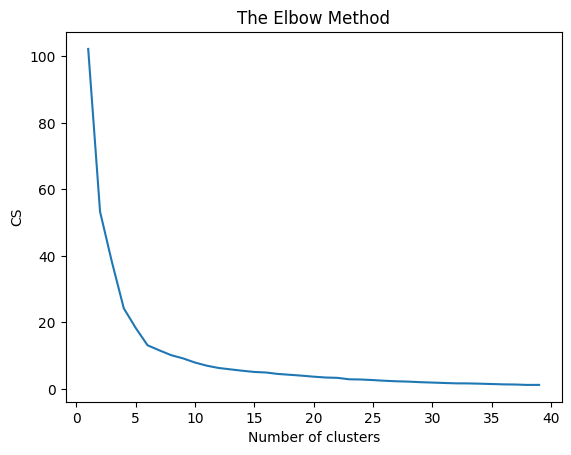

In [36]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

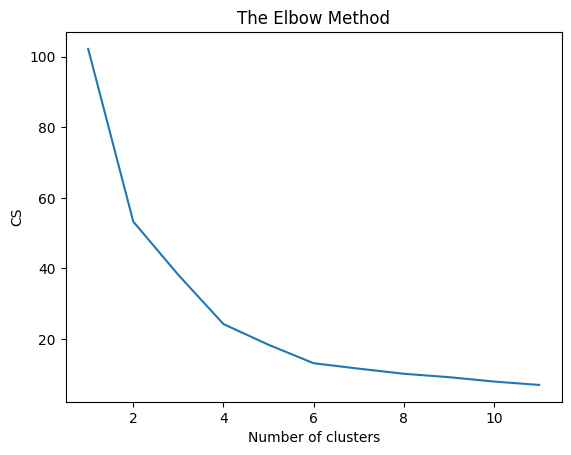

In [37]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [59]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('jm_aut_l')
print(labels)

[2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 2 2 3 3 2 2 2 2 3 2 3 3 3 2 3 0 2 2 2 3 3
 2 2 2 3 3 0 3 3 3 3 3 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 0 0 2 2 2 2 2 3 3 2
 3 3 3 2 3 2 3 3 2 3 3 2 3 2 3 2 2 2 2 2 0 0 3 2 2 2 2 2 2 2 3 3 3 3 3 2 2
 3 1 2 3 3 1 3 3 1 2 2 2 2 0 0 3 3 3 3 3 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 2
 0 0 1 1 0 0 1 0 0 0 0 0 0 3 1 0 0 0 1 0 0 1 1 1 3 1 1 1 0 0 0 0 0 3 3 3 3
 2 2 2 3 3 3 3 3 1 1 1 1 0 1 0 1 0 0 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 0 0 0 1 0 0 3 3 0 3 0 0 0 0 0 0 0 2 1 1 0 1 1 1 2 2 1 3 3 1 0 0 0 1 0 3 3
 1 0 1 1 1 1 0 0 0 0 1]


In [60]:
Z=kmeans.cluster_centers_
Z

array([[-1.11022302e-16,  1.69892473e-01,  1.97447714e-01,
         4.48340346e-01,  6.08947048e-01],
       [ 7.39284136e-01,  2.17204301e-01,  5.18255938e-01,
         4.80715288e-01,  6.06208156e-01],
       [ 8.56768735e-01,  1.88235294e-01,  4.34065934e-01,
         2.48188406e-01, -1.66533454e-16],
       [ 4.03933966e-03,  1.23076923e-01,  1.74978867e-01,
         2.21943515e-01, -2.77555756e-16]])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 270 samples in 0.000s...
[t-SNE] Computed neighbors for 270 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 270 / 270
[t-SNE] Mean sigma: 0.367058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.649689
[t-SNE] KL divergence after 5000 iterations: -0.267245


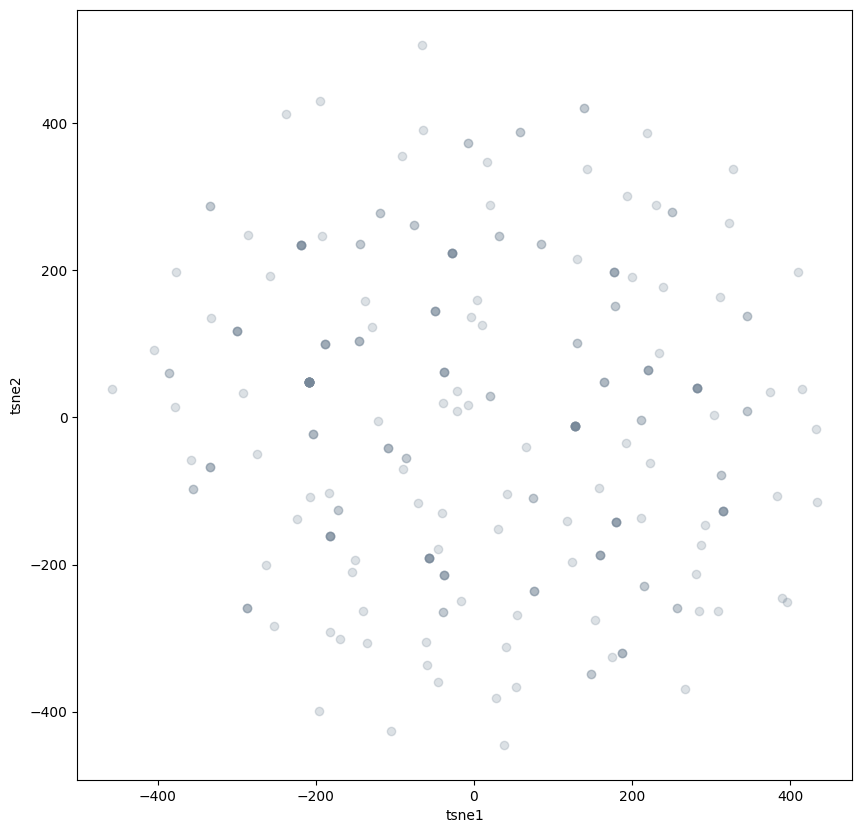

In [61]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [62]:
import matplotlib

In [63]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 270 samples in 0.000s...
[t-SNE] Computed neighbors for 270 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 270 / 270
[t-SNE] Mean sigma: 0.367058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.440708
[t-SNE] KL divergence after 1800 iterations: -0.054543


In [64]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

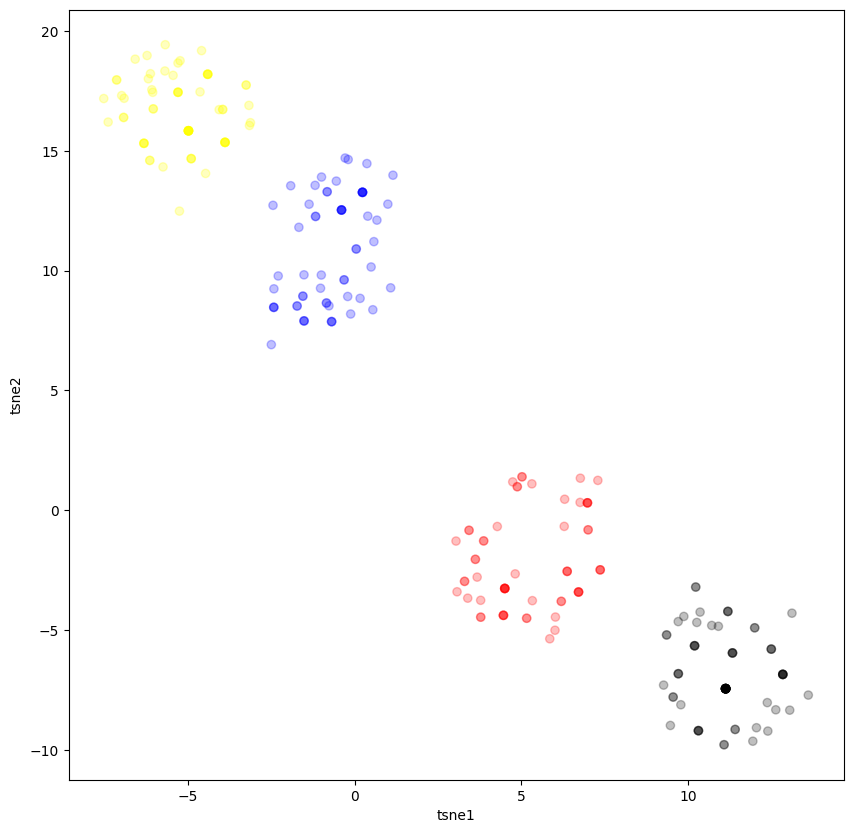

In [65]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [66]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_jm_aut.csv')
Z2

array([[ 7.50000000e+01,  3.71935484e+01,  3.79677419e+01,
         9.18709677e+01,  3.22741935e+01],
       [ 1.82935484e+02,  4.00322581e+01,  6.71612903e+01,
         9.63387097e+01,  3.21290323e+01],
       [ 2.00088235e+02,  3.82941176e+01,  5.95000000e+01,
         6.42500000e+01, -8.82627305e-15],
       [ 7.55897436e+01,  3.43846154e+01,  3.59230769e+01,
         6.06282051e+01, -1.47104551e-14]])